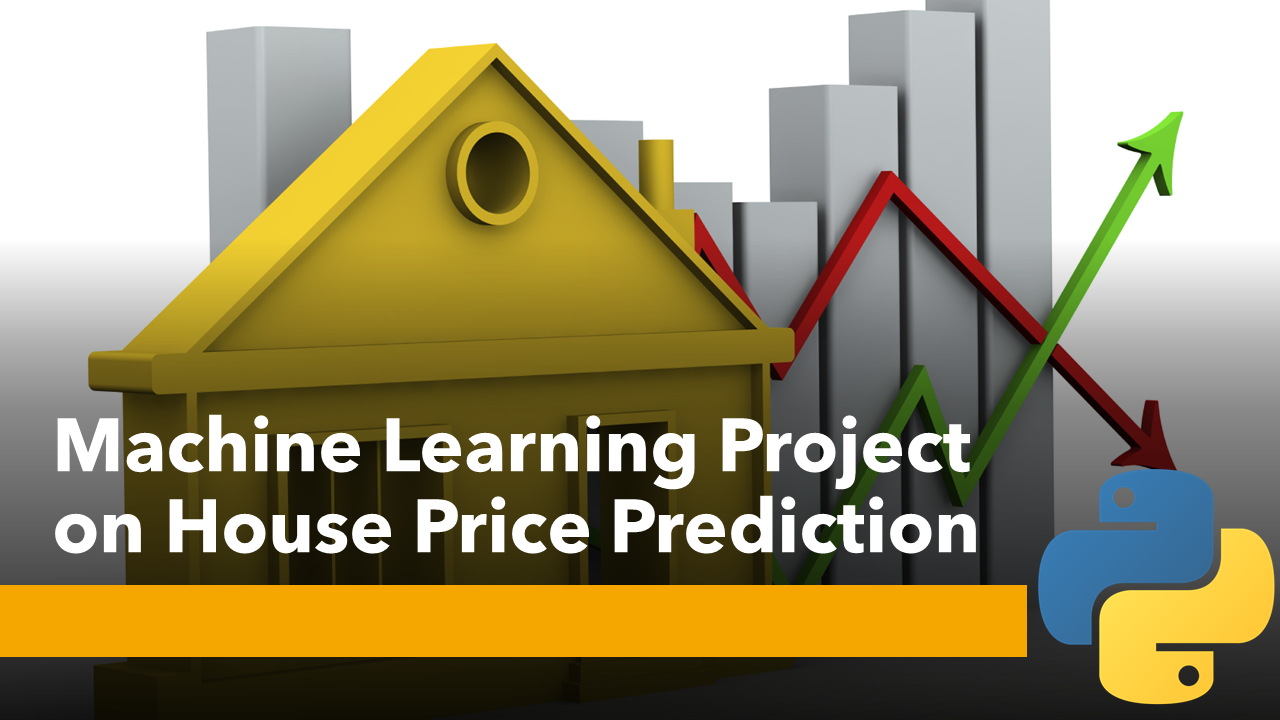

# PRCP - 1020 - House Price Prediction


# Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which will help the bank marketing team to know which customer will buy the product.

Task3:-Suggestions to the Bank market team to make  customers  buy the product.



# To predict the price of house based on given features

In [1]:
# Importing The necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

In [2]:
# Load the data set
data=pd.read_csv("data.csv")

# Basic Checks:

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Exploratory Data Analysis

<Axes: title={'center': 'Heatmap of missing values'}>

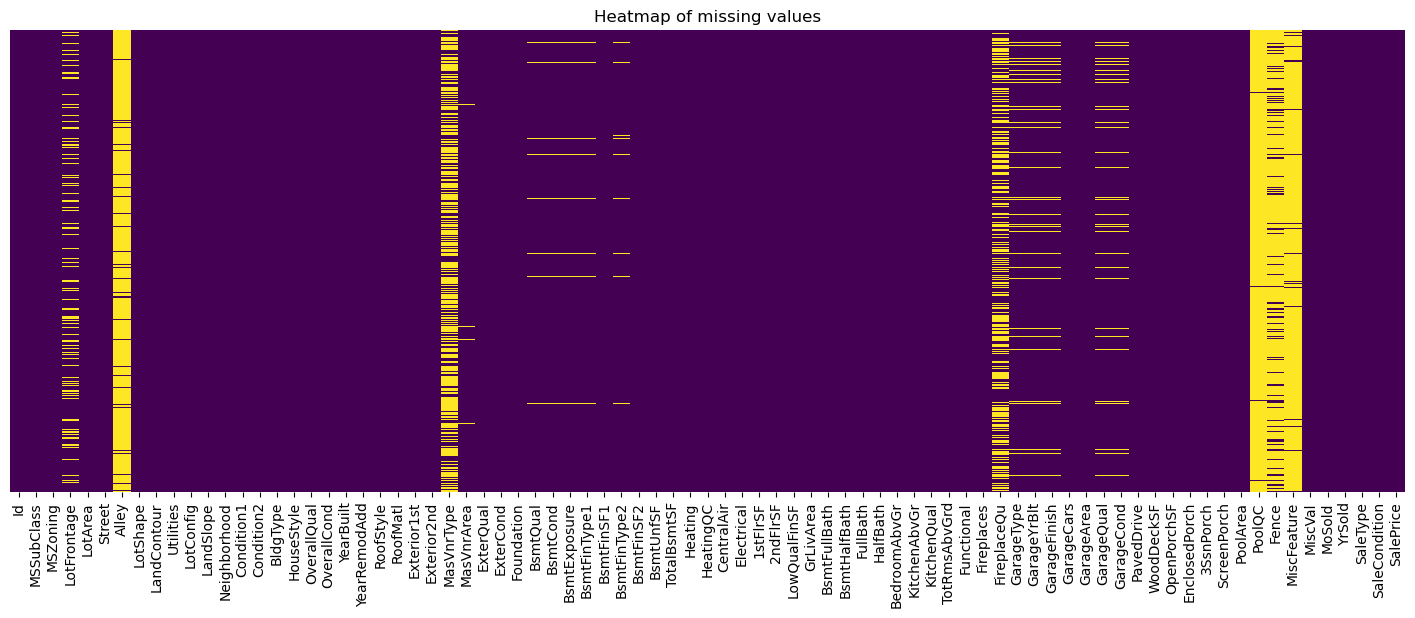

In [6]:
plt.figure(figsize=(18,6))
plt.title('Heatmap of missing values')
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
df1 = data

In [8]:
data.shape

(1460, 81)

In [9]:
data1=(data.dtypes == 'object')
object_columns = list(data1[data1].index)
print("Categorical variables:")
print(object_columns)

data2=(data.dtypes == 'int')
num_columns = list(data2[data2].index)
print("Interger variables:")
print(num_columns)

data3=(data.dtypes == 'float')
float_columns = list(data3[data3].index)
print("Real variables:")
print(float_columns)

Categorical variables:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Interger variables:
[]
Real variables:
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [10]:
print(data.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

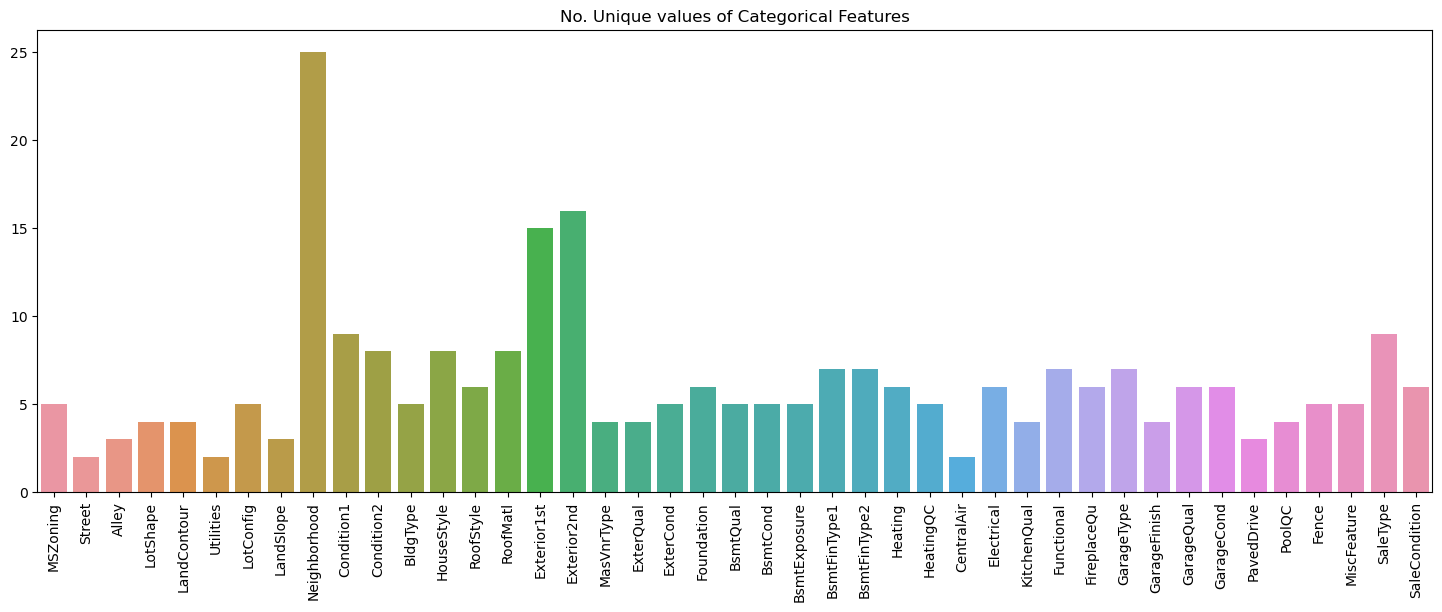

In [11]:
unique_values = []
for col in object_columns:
  unique_values.append(data[col].unique().size)
plt.figure(figsize=(18,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_columns,y=unique_values)


C:\Users\dipan\AppData\Local\Temp\ipykernel_9536\373891439.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11,4,index)


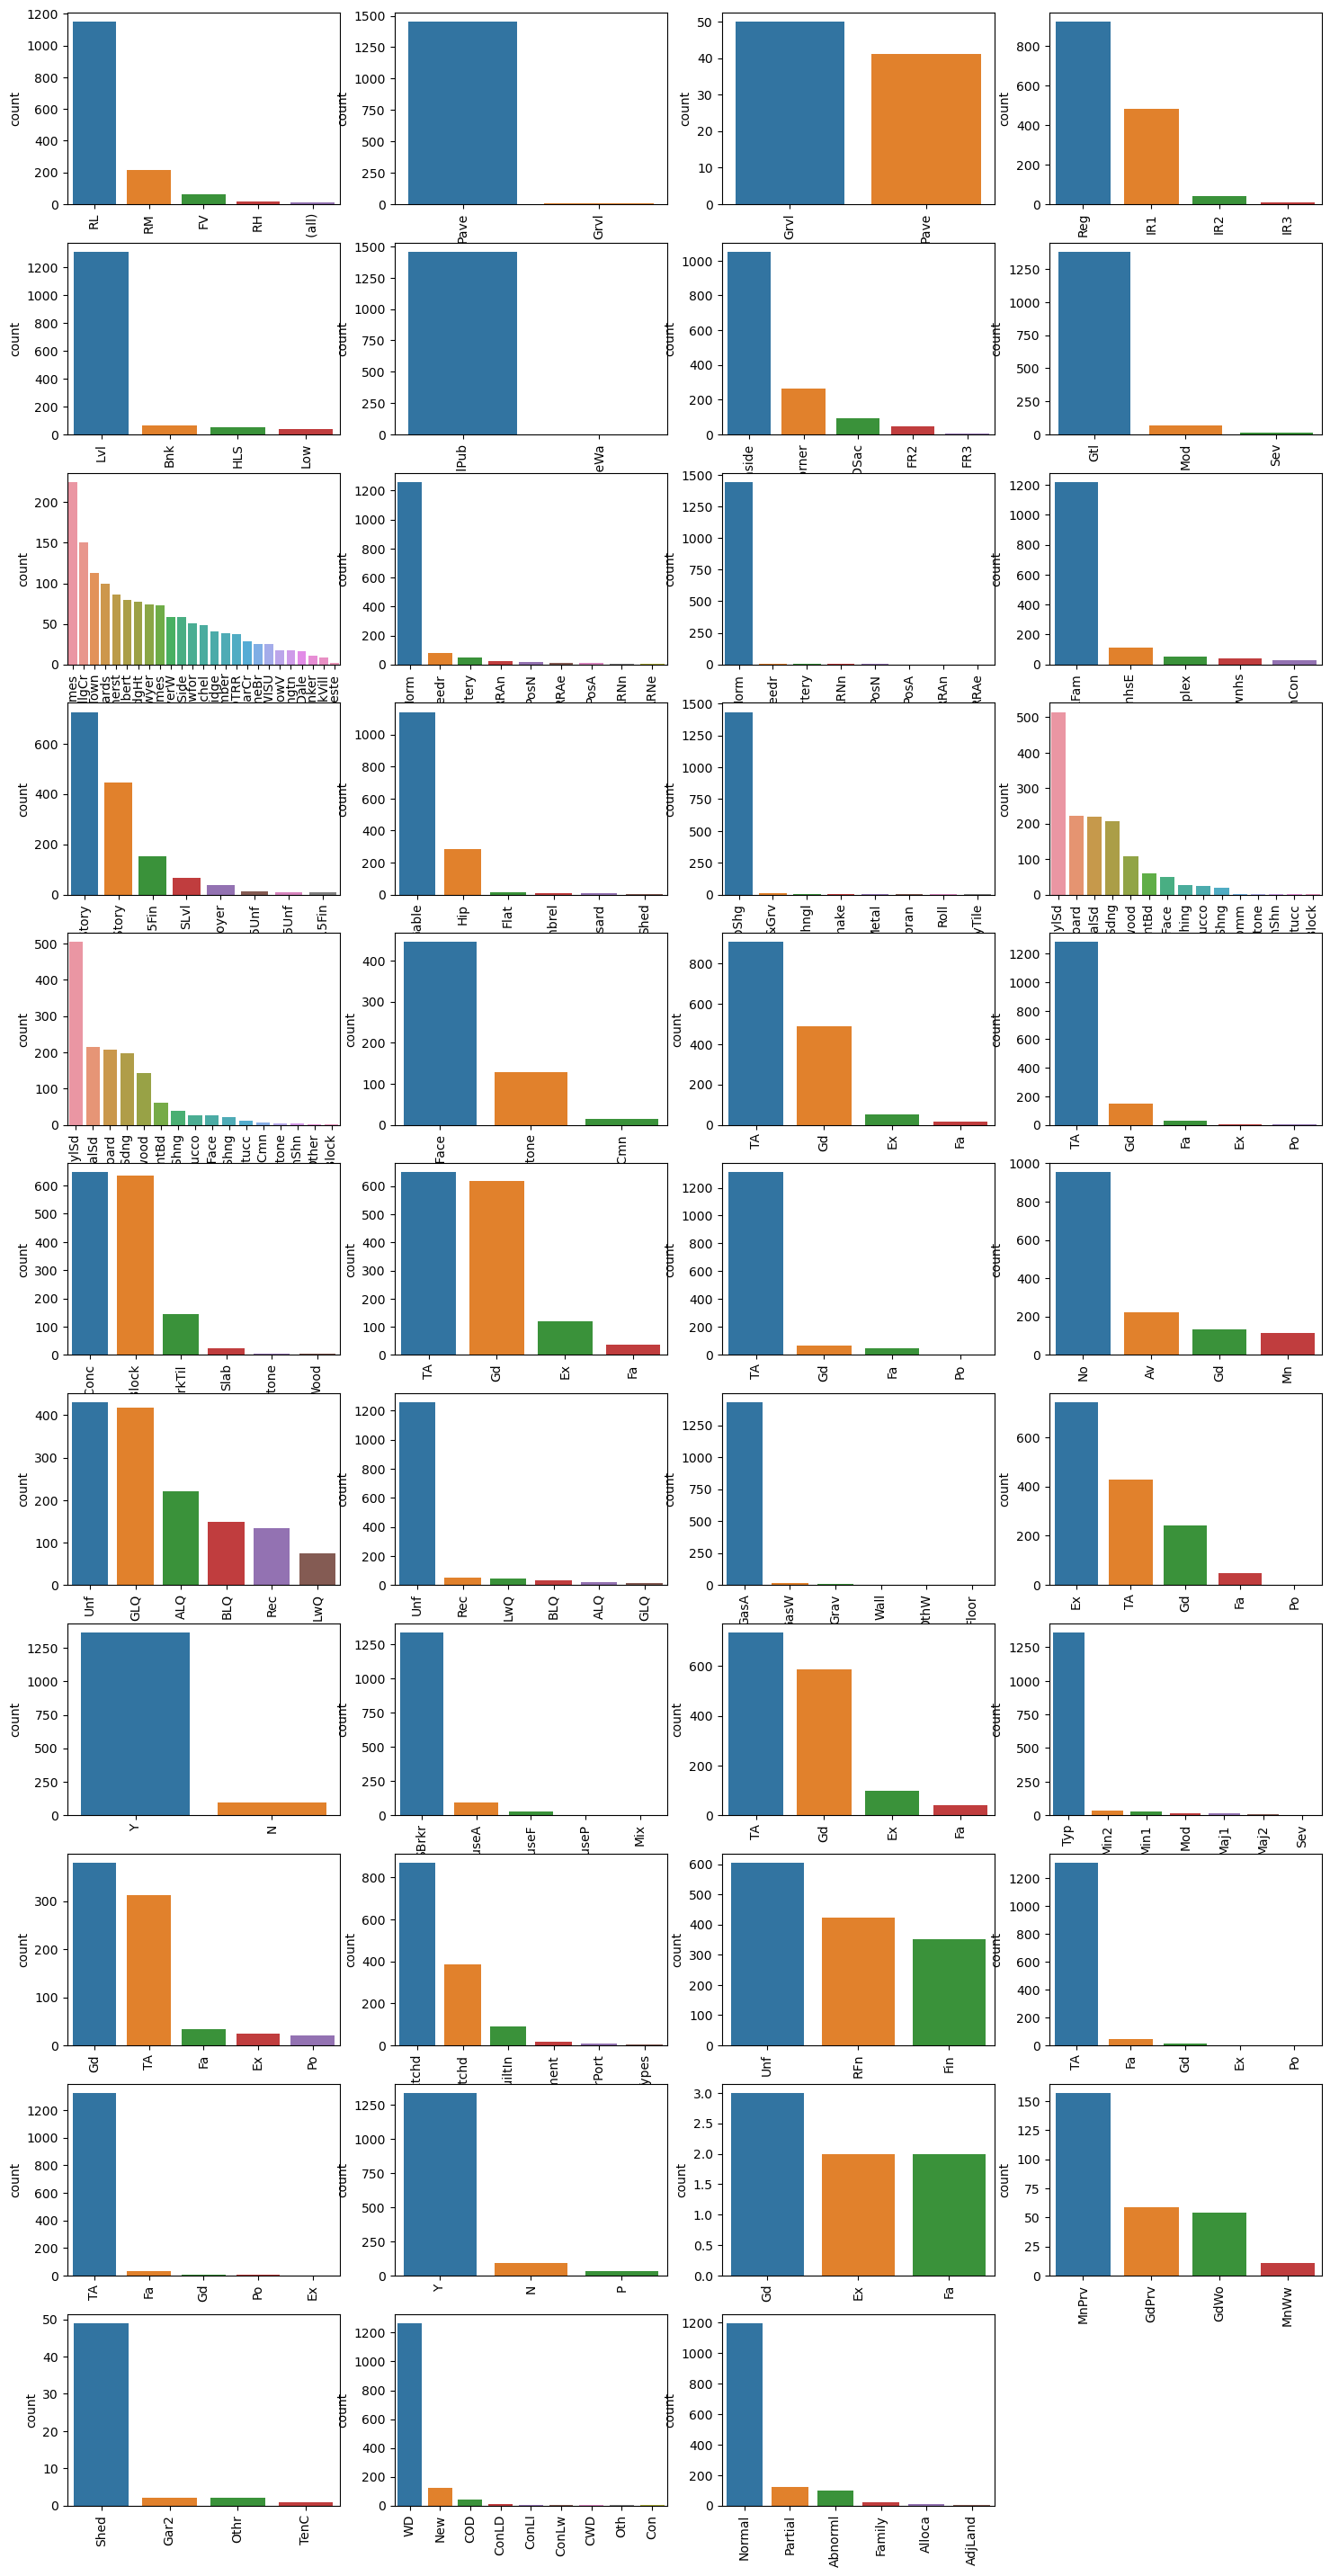

In [12]:
plt.figure(figsize=(18,36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
for col in object_columns:
  y = data[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1


## Data Pre-processing

In [ ]:
print(data.isnull().sum())

In [ ]:
# Fill up missing values:

      # Drop the features 'Alley', 'Fence', and 'MiscFeature'.

      # Drop 'Utilities' feature, as all but one have the value 'AllPub'

      # All entries with missing 'FirePlaceQu' have 'Fireplaces' = 0. Hence fill missing values with 'NA'.

      # All but one entries with missing 'PoolQC' value have 'PoolArea' = 0. Use mode for missing value with non-zero PoolArea. Use 'NA' for the rest of the entries.

      # Basement features: Fill missing values with 'NA' or '0'.

      # Garage features: Fill missing values with 'NA' or '0'.

      # Remaining Integer and Real features: fill up missing values with mean of the corresponding feature.

      # Remaining Categorical features: fill up missing values with mode of the corresponding feature.

In [13]:
data.drop(columns='Id',inplace=True); print('Drop Id \n')
data.drop(columns='Alley',inplace=True); print('Drop Alley \n')
data.drop(columns='Utilities',inplace=True); print('Drop Utilities \n')
data.drop(columns=['Fence','MiscFeature','SalePrice'],inplace=True); print('Drop Fence, MiscFeature and SalePrice\n')
# Do not run cell repeatedly ...only once.


Drop Id 

Drop Alley 

Drop Utilities 

Drop Fence, MiscFeature and SalePrice



In [14]:
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mean())
data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
data['MasVnrType'] = data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].mean())
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])
data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])
data['Functional'] = data['Functional'].fillna(data['Functional'].mode()[0])
data['FireplaceQu'] = data['FireplaceQu'].fillna('NA'); print('FirePlaceQu: Fill NA values for missing values \n')
data.loc[(data['PoolQC'].isnull()) & data['PoolArea']>0][['PoolQC','PoolArea']]
data.at[2599,'PoolQC'] = data['PoolQC'].mode()[0]; print('PoolQC: Use mode for missing value with non-zero PoolAre \n')
data['PoolQC'] = data['PoolQC'].fillna('NA'); print('PoolQC: Use NA for remaining missing values \n')
data['SaleType'].fillna(data['SaleType'].mode()[0],inplace=True)


FirePlaceQu: Fill NA values for missing values 

PoolQC: Use mode for missing value with non-zero PoolAre 

PoolQC: Use NA for remaining missing values 



In [15]:
# Basement Features
print('Fill missing values of Basement features with NA or 0 \n')
data['BsmtQual'] = data['BsmtQual'].fillna('NA')
data['BsmtCond'] = data['BsmtCond'].fillna('NA')
data['BsmtExposure'] = data['BsmtExposure'].fillna('NA')
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('NA')
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('NA')

data['BsmtFinSF1'] = data['BsmtFinSF1'].fillna(int(0))
data['BsmtFinSF2'] = data['BsmtFinSF2'].fillna(int(0))
data['BsmtUnfSF'] = data['BsmtUnfSF'].fillna(int(0))
data['TotalBsmtSF'] = data['TotalBsmtSF'].fillna(int(0))
data['BsmtFullBath'] = data['BsmtFullBath'].fillna(int(0))
data['BsmtHalfBath'] = data['BsmtHalfBath'].fillna(int(0))

# Garage Features
print('Fill missing values of Garage features with NA or 0 \n')
data['GarageType'] = data['GarageType'].fillna('NA')
data['GarageFinish'] = data['GarageFinish'].fillna('NA')
data['GarageCond'] = data['GarageCond'].fillna('NA')
data['GarageQual'] = data['GarageQual'].fillna('NA')
data['GarageCars'] = data['GarageCars'].fillna(int(0))
data['GarageArea'] = data['GarageArea'].fillna(int(0))
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(int(0))


Fill missing values of Basement features with NA or 0 

Fill missing values of Garage features with NA or 0 



In [16]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,0.0,0.0,0.0,0.0,NA,0.0,2.0,2008.0,WD,Normal
1,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,FR2,Gtl,Veenker,...,0.0,0.0,0.0,0.0,NA,0.0,5.0,2007.0,WD,Normal
2,60.0,RL,68.0,11250.0,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,0.0,0.0,0.0,0.0,NA,0.0,9.0,2008.0,WD,Normal
3,70.0,RL,60.0,9550.0,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,272.0,0.0,0.0,0.0,NA,0.0,2.0,2006.0,WD,Abnorml
4,60.0,RL,84.0,14260.0,Pave,IR1,Lvl,FR2,Gtl,NoRidge,...,0.0,0.0,0.0,0.0,NA,0.0,12.0,2008.0,WD,Normal


In [17]:
data.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1456,20.0,RL,85.0,13175.0,Pave,Reg,Lvl,Inside,Gtl,NWAmes,...,0.0,0.0,0.0,0.0,NA,0.0,2.0,2010.0,WD,Normal
1457,70.0,RL,66.0,9042.0,Pave,Reg,Lvl,Inside,Gtl,Crawfor,...,0.0,0.0,0.0,0.0,NA,2500.0,5.0,2010.0,WD,Normal
1458,20.0,RL,68.0,9717.0,Pave,Reg,Lvl,Inside,Gtl,NAmes,...,112.0,0.0,0.0,0.0,NA,0.0,4.0,2010.0,WD,Normal
1459,20.0,RL,75.0,9937.0,Pave,Reg,Lvl,Inside,Gtl,Edwards,...,0.0,0.0,0.0,0.0,NA,0.0,6.0,2008.0,WD,Normal
2599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Gd,NaN,NaN,NaN,WD,NaN


In [18]:
data.drop(2599, inplace=True)

In [19]:
data.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1455,60.0,RL,62.0,7917.0,Pave,Reg,Lvl,Inside,Gtl,Gilbert,...,0.0,0.0,0.0,0.0,NA,0.0,8.0,2007.0,WD,Normal
1456,20.0,RL,85.0,13175.0,Pave,Reg,Lvl,Inside,Gtl,NWAmes,...,0.0,0.0,0.0,0.0,NA,0.0,2.0,2010.0,WD,Normal
1457,70.0,RL,66.0,9042.0,Pave,Reg,Lvl,Inside,Gtl,Crawfor,...,0.0,0.0,0.0,0.0,NA,2500.0,5.0,2010.0,WD,Normal
1458,20.0,RL,68.0,9717.0,Pave,Reg,Lvl,Inside,Gtl,NAmes,...,112.0,0.0,0.0,0.0,NA,0.0,4.0,2010.0,WD,Normal
1459,20.0,RL,75.0,9937.0,Pave,Reg,Lvl,Inside,Gtl,Edwards,...,0.0,0.0,0.0,0.0,NA,0.0,6.0,2008.0,WD,Normal


In [20]:
print(data.isnull().sum().sum()) #No NULL Values present id DataSet

0


In [21]:
# Import Onehot encoder to encode categorical features:
from sklearn.preprocessing import OneHotEncoder
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',len(object_cols))

Categorical variables:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'SaleType', 'SaleCondition']
No. of. categorical features:  39


In [22]:
OH_encoder = OneHotEncoder()
OH_cols = OH_encoder.fit_transform(data[object_cols])
OH_cols_df = pd.DataFrame(OH_cols.toarray(), columns=OH_encoder.get_feature_names_out(object_cols))
OH_cols_df.index = data.index
data_final = data.drop(object_cols, axis=1)
data_combined = pd.concat([data_final, OH_cols_df], axis=1)

In [23]:
data_final.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0


In [24]:
data_combined.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [62]:
print(data_combined.columns.tolist())

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighbo

In [25]:
# Appending the target col to dataset

df1=pd.read_csv("data.csv")
data_combined = pd.concat([data_combined, df1['SalePrice']], axis=1)

## Training the Model

In [26]:
#Imporing Test Train Split
import pandas as pd
from sklearn.model_selection import train_test_split

In [27]:
X = data_combined.drop(['SalePrice'], axis=1)  # features
y = data_combined['SalePrice'] #target

In [66]:
df1.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #TestTrainSplit

## Model Selection and Prediction

In [29]:
# Importing Necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score


# Defining models
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=100, random_state=42),
    GradientBoostingRegressor()
]

# Evaluating each model
for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculating  metrics
    mse = mean_squared_error(y_test, y_pred)
    #accuracy = accuracy_score(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"MSE: {mse:.2f}")
    #print(f"Accuracy: {accuracy:.2f}")
    print(f"R2 Score: {r2:.2f}")
    print("---")

Model: LinearRegression
MSE: 877573329.69
R2 Score: 0.89
---
Model: DecisionTreeRegressor
MSE: 1802245667.57
R2 Score: 0.77
---
Model: RandomForestRegressor
MSE: 857266616.74
R2 Score: 0.89
---
Model: GradientBoostingRegressor
MSE: 782626094.48
R2 Score: 0.90
---


# Therefore we conclude that 'GradientBoostingRegressor' Model is Best for predicting the House Price more Accurately.

In [70]:
##Reason##

# The R2 Score of Gradient Boosting Regressor is higher than other models.
# And MeanSquaredErrror Value is least compared to other models.

# Overall Report:
    
•	The dataset contains 1460 samples with 81 attributes, with the last attribute being the target attribute, indicating labelled data.

•	There are so many null values present inside the Dataset.


•	There are different types of features present in the Dataset like integer, object & float



# Model Comparision Report:

1.	Model: LinearRegression
    
            MSE: 877573329.69
            R2 Score: 0.89
          
2.	Model: DecisionTreeRegressor
     
            MSE: 1802245667.57
            R2 Score: 0.77
      
3.	Model: RandomForestRegressor
     
            MSE: 857266616.74
            R2 Score: 0.89
    
4.	Model: GradientBoostingRegressor
     
            MSE: 782626094.48
            R2 Score: 0.90



# Report on Challenges Faced¶: 

  During the project, we encountered several challenges that impacted our analysis and modeling process:
    
    1. After filling up null values,when check for sum of null values,it gave some value but fixed later & it gave 0.
    2. After converting categorical features to numerical features, it was found difficult add to the final dataset 
        but fixed   later.
    3. By mistake we drop the labeled data, then we add that one from main dataset.
    

# PTID-CDS-MAR-24-1870 Team Info:
1. Dipanjali

         (01-MAY-23-CDS-ONL-BUN-021-WDE20)
          email:satyas.behera@gmail.com / dipanjalipatra@gmail.com
            
2. Vinay C

          (09-Oct-23-CDS-BUN-021-WDE20-ONL)
          email: vinayvinay9617@gmail.com
            
3. Sandeep Chandra Sagar R

          (09-Oct-23-CDS-BUN-021-WDE20-ONL)
          email: sanwithdeep@gmail.com